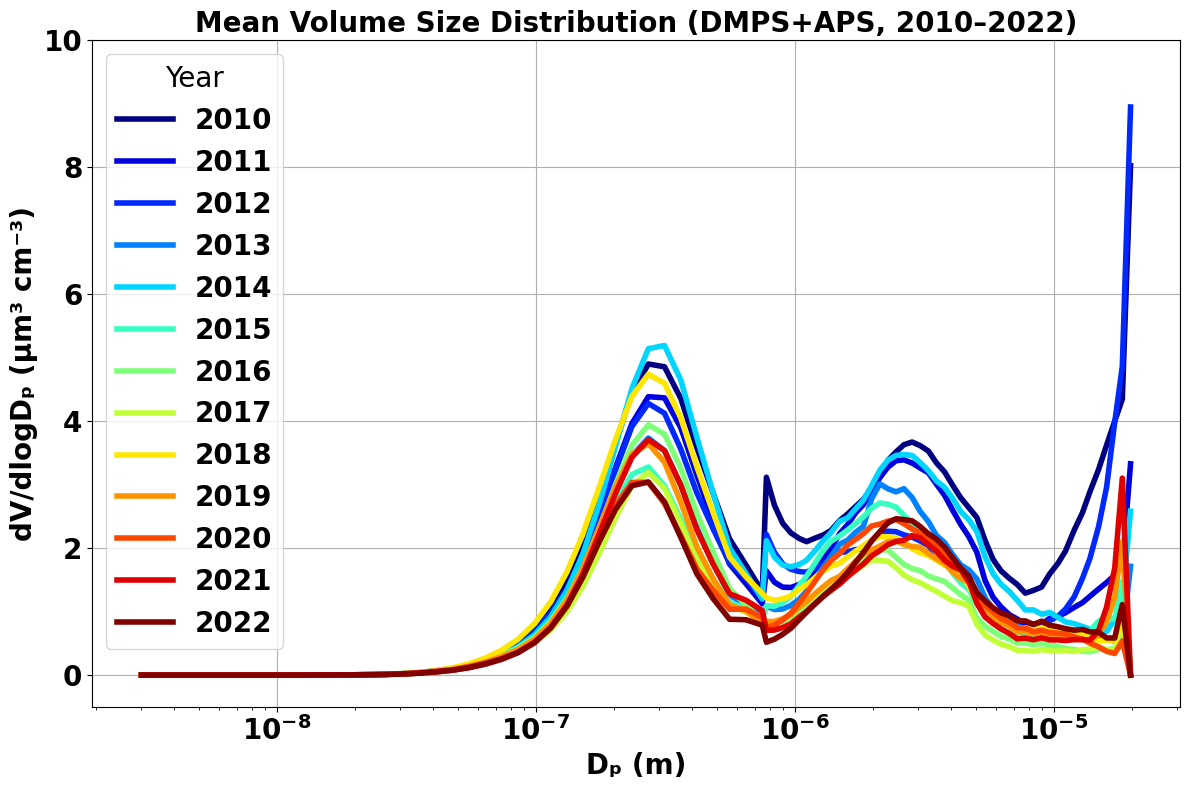

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using the mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean Volume Size Distribution (DMPS+APS, 2010–2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
    ax.set_ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. Volume_Distribution_dV_dlogDp.xlsx'
y_min = -0.5  # Set minimum y-axis value
y_max = 10  # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

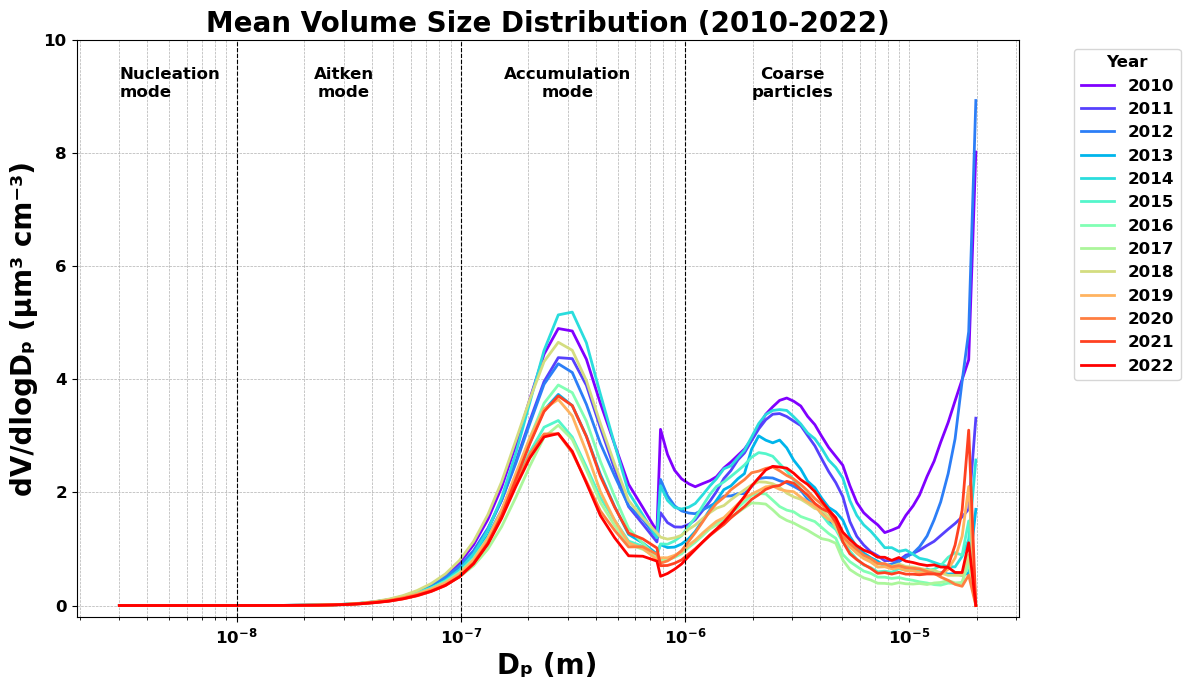

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['Year'] = df['datetime'].dt.year

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:-1]  # Exclude datetime and Year
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors
volume_df['Year'] = df['Year']

# Group by year and compute mean volume size distribution
yearly_means = volume_df.groupby('Year').mean()

# Plotting
plt.figure(figsize=(12, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(yearly_means)))  # Rainbow colors

for i, year in enumerate(yearly_means.index):
    plt.plot(diameters_m, yearly_means.loc[year], label=str(year), color=colors[i], linewidth=2)

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 10)
plt.xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')
plt.title('Mean Volume Size Distribution (2010-2022)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes (moved to top of plot, bold)
y_label_pos = 9
plt.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
plt.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

# Move legend outside the plot, bold font
leg = plt.legend(
    title='Year',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    prop={'weight': 'bold', 'size': 12}, 
    title_fontsize=12
)
leg.get_title().set_fontweight('bold') 

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

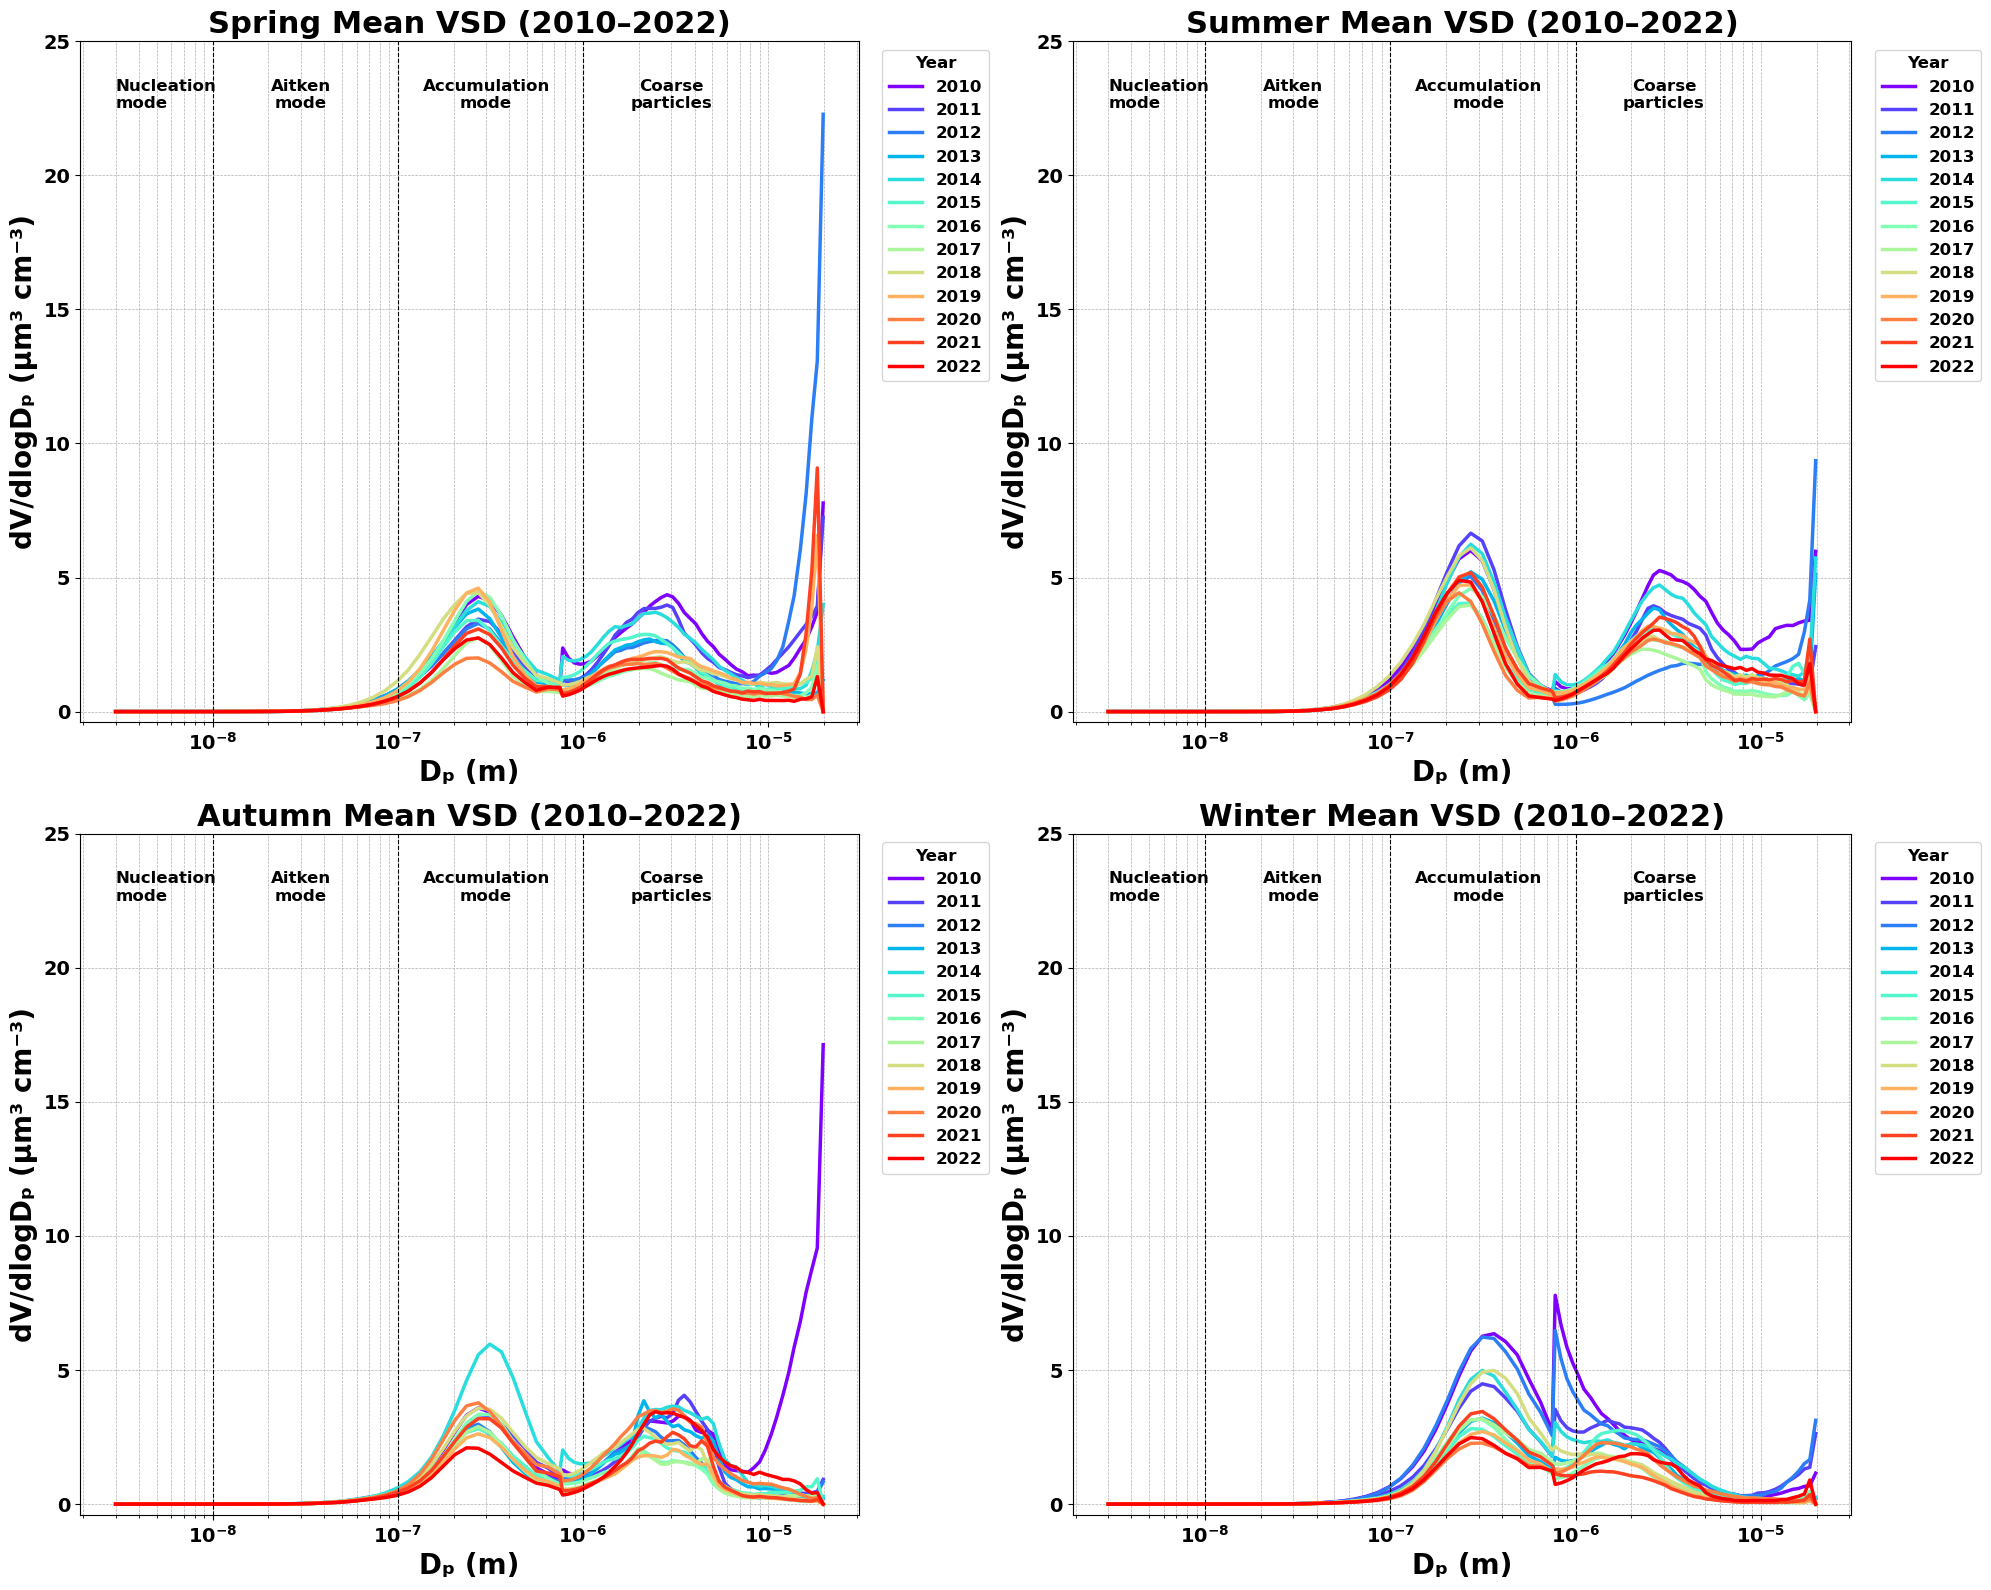

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_vsd_by_season(file_path, y_min, y_max):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Convert 'datetime' column to datetime format and extract year/month
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Extract particle diameter columns (exclude datetime, Year, Month)
    # -> assuming structure: [datetime, diameter1, diameter2, ..., diameterN, Year, Month]
    diameter_cols = df.columns[1:-2]
    diameters_m = np.array([float(col) for col in diameter_cols])  # in meters
    diameters_um = diameters_m * 1e6  # convert to micrometers

    # Calculate volume factors in µm³: (π/6) * Dp^3
    volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

    # Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
    volume_df = df[diameter_cols] * volume_factors
    volume_df['Year'] = df['Year']
    volume_df['Month'] = df['Month']

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare figure with 4 subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()

    # Loop through each season
    for i, (season, months) in enumerate(seasons.items()):
        ax = axes[i]
        season_data = volume_df[volume_df['Month'].isin(months)]

        if season_data.empty:
            ax.set_title(f'{season} (No Data)', fontsize=22, weight='bold')
            ax.axis('off')
            continue

        years = sorted(season_data['Year'].unique())
        colors = plt.cm.rainbow(np.linspace(0, 1, len(years)))

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Year'] == year]
            mean_vsd = yearly_data[diameter_cols].mean()
            ax.plot(diameters_m, mean_vsd,
                    linewidth=2.5, color=color, label=str(year))

        # Axis settings
        ax.set_xscale('log')
        ax.set_ylim(y_min, y_max)
        ax.set_title(f'{season} Mean VSD (2010–2022)', fontsize=22, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
        ax.set_ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')

        # Vertical lines for particle mode regions
        ax.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

        # Annotate modes at 90% of y-axis
        y_label_pos = y_max * 0.9
        ax.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
        ax.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

        # Legend only if data exist
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            leg = ax.legend(
                title='Year', fontsize=12, title_fontsize=12,
                bbox_to_anchor=(1.02, 1), loc='upper left',
                prop={'weight': 'bold', 'size': 12}
            )
            leg.get_title().set_fontweight('bold')

        # Grid and ticks
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=14, labelcolor='black')
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

    # Layout
    plt.tight_layout()
    plt.show()
    plt.close(fig)


# === Run the function on your actual file ===
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
y_min = -0.4
y_max = 25

plot_mean_vsd_by_season(file_path, y_min, y_max)

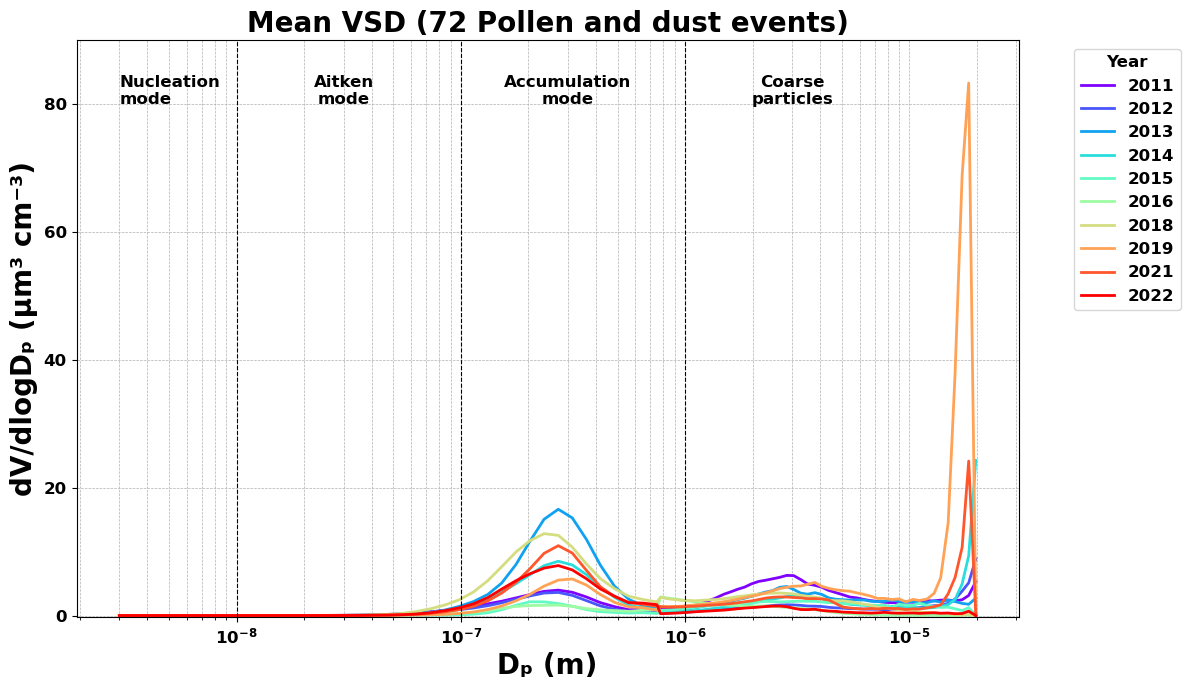

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. 72 Pollen and dust events.xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['Year'] = df['datetime'].dt.year

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:-1]  # Exclude datetime and Year
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors
volume_df['Year'] = df['Year']

# Group by year and compute mean volume size distribution
yearly_means = volume_df.groupby('Year').mean()

# Plotting
plt.figure(figsize=(12, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(yearly_means)))  # Rainbow colors

for i, year in enumerate(yearly_means.index):
    plt.plot(diameters_m, yearly_means.loc[year], label=str(year), color=colors[i], linewidth=2)

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 90)
plt.xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')
plt.title('Mean VSD (72 Pollen and dust events)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes (moved to top of plot, bold)
y_label_pos = 80
plt.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
plt.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

# Move legend outside the plot, bold font
leg = plt.legend(
    title='Year',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    prop={'weight': 'bold', 'size': 12}, 
    title_fontsize=12
)
leg.get_title().set_fontweight('bold') 

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

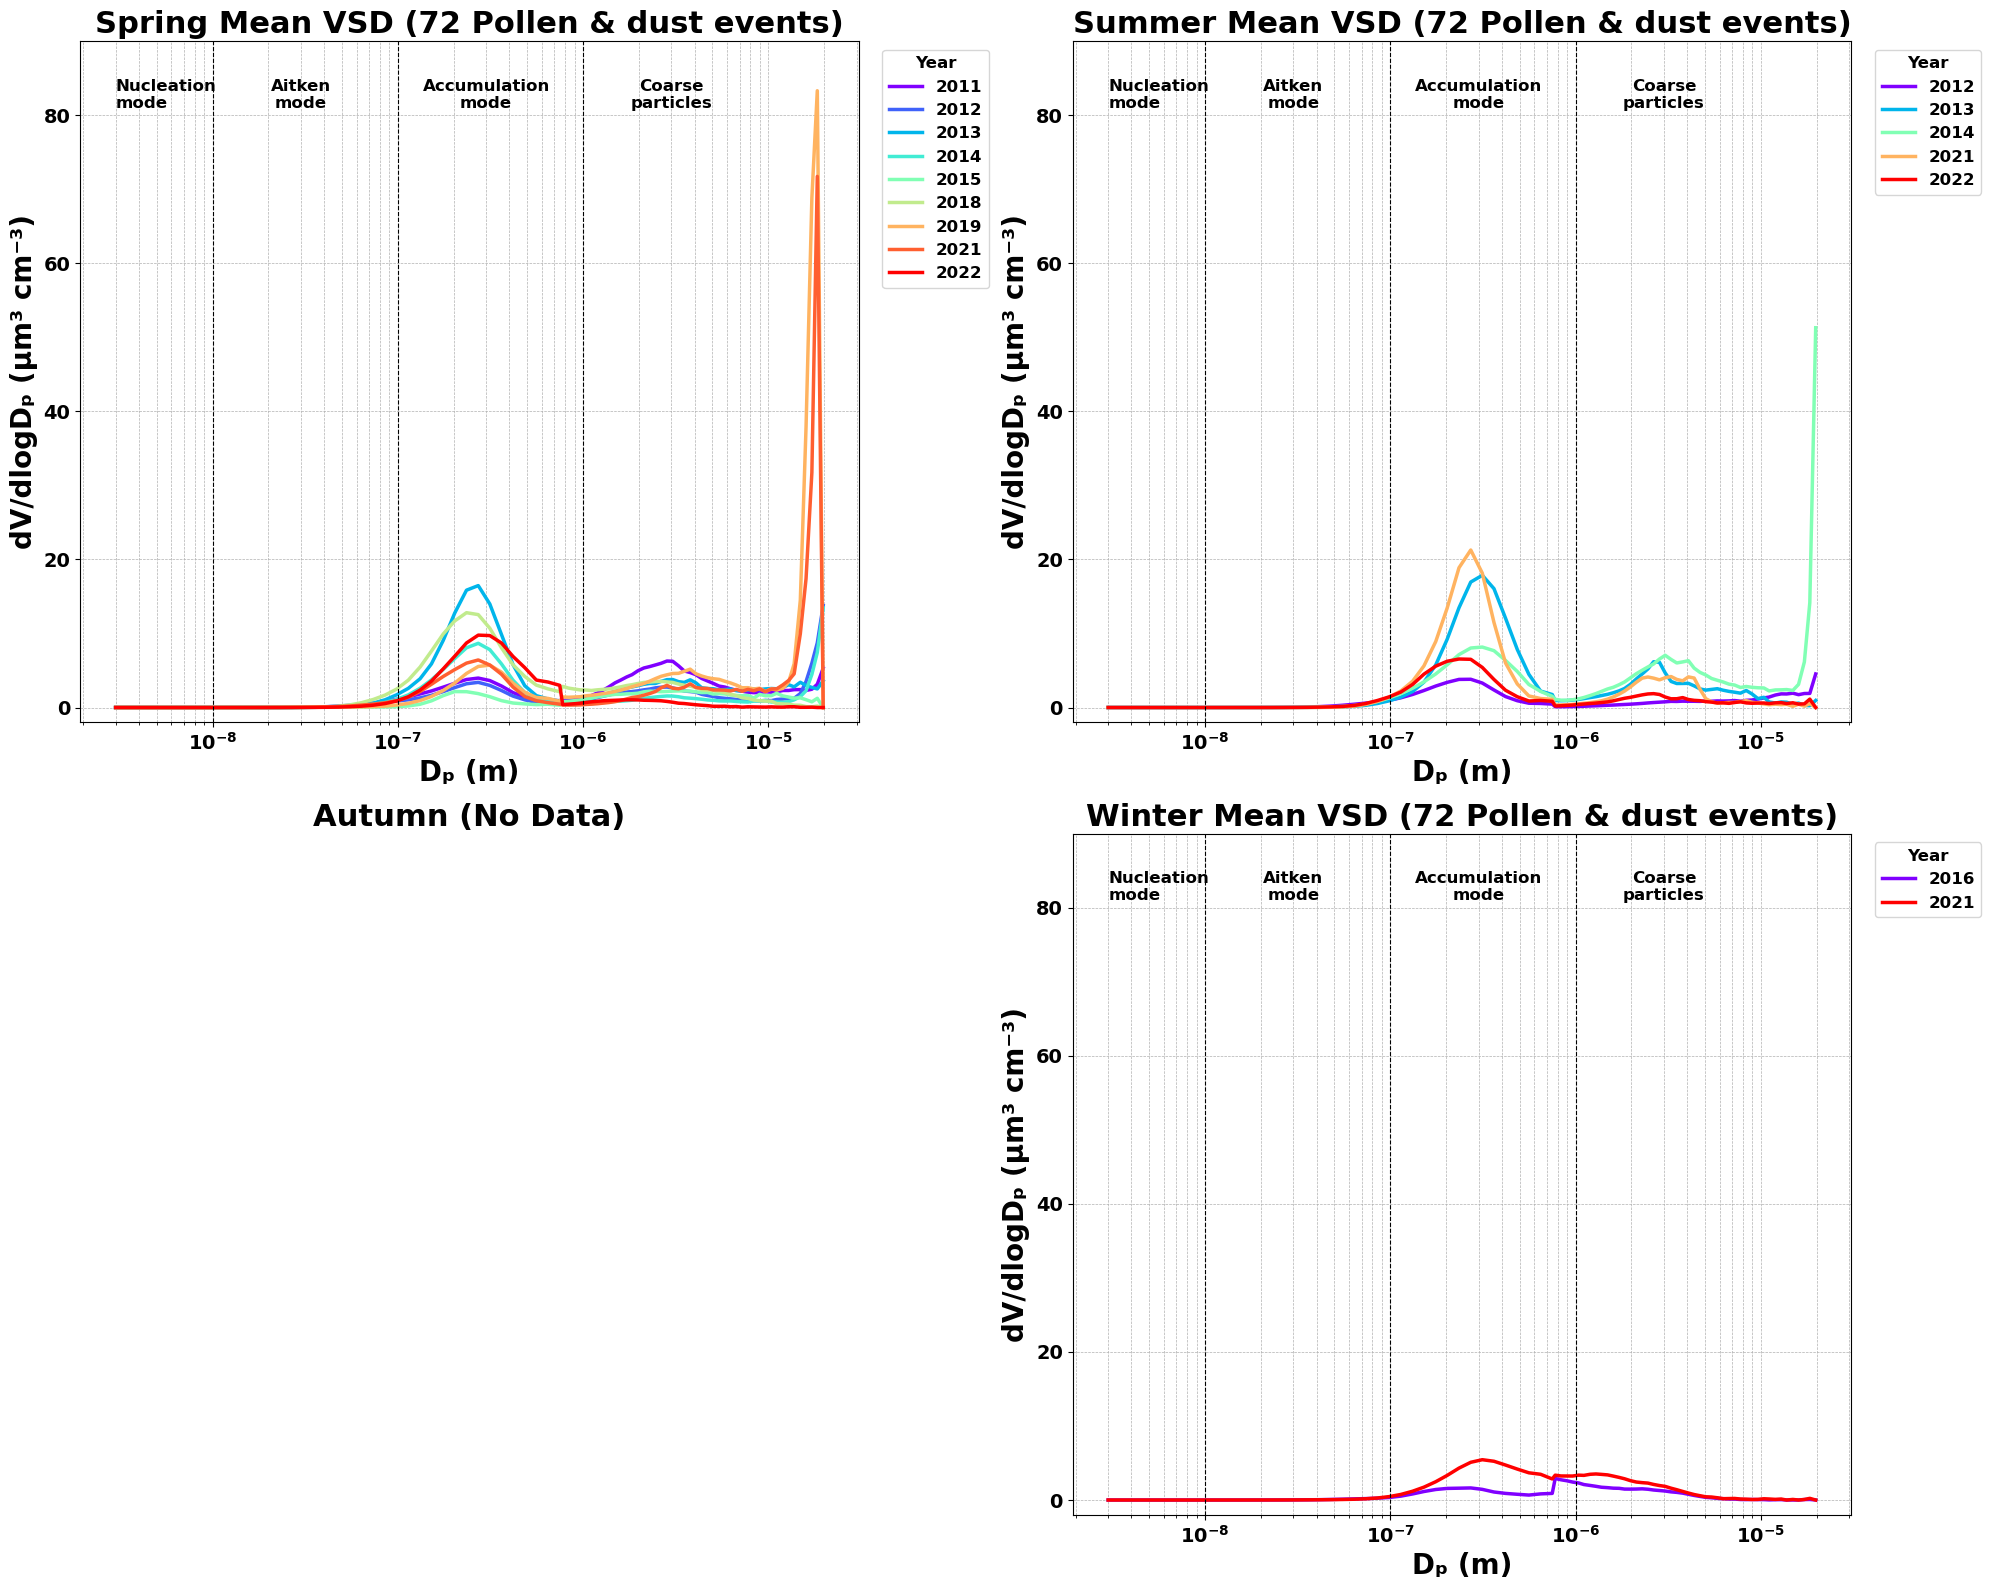

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_vsd_by_season(file_path, y_min, y_max):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Convert 'datetime' column to datetime format and extract year/month
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Extract particle diameter columns and convert to float
    diameter_cols = df.columns[1:-2]  # Exclude datetime, Year, Month
    diameters_m = np.array([float(col) for col in diameter_cols])  # in meters
    diameters_um = diameters_m * 1e6  # convert to micrometers

    # Calculate volume factors in µm³: (π/6) * Dp^3
    volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

    # Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
    volume_df = df[diameter_cols] * volume_factors
    volume_df['Year'] = df['Year']
    volume_df['Month'] = df['Month']

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare figure with 4 subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()

    # Loop through each season
    for i, (season, months) in enumerate(seasons.items()):
        ax = axes[i]
        season_data = volume_df[volume_df['Month'].isin(months)]

        if season_data.empty:
            ax.set_title(f'{season} (No Data)', fontsize=22, weight='bold')
            ax.axis('off')
            continue

        years = sorted(season_data['Year'].unique())
        colors = plt.cm.rainbow(np.linspace(0, 1, len(years)))

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Year'] == year]
            mean_vsd = yearly_data[diameter_cols].mean()
            ax.plot(diameters_m, mean_vsd,
                    linewidth=2.5, color=color, label=str(year))

        # Axis settings
        ax.set_xscale('log')
        ax.set_ylim(y_min, y_max)
        ax.set_title(f'{season} Mean VSD (72 Pollen & dust events)', fontsize=22, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
        ax.set_ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')

        # Vertical lines for particle mode regions
        ax.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

        # Annotate modes at 90% of y-axis
        y_label_pos = y_max * 0.9
        ax.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
        ax.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

        # Legend only if data exist
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            leg = ax.legend(
                title='Year', fontsize=12, title_fontsize=12,
                bbox_to_anchor=(1.02, 1), loc='upper left',
                prop={'weight': 'bold', 'size': 12}
            )
            leg.get_title().set_fontweight('bold')

        # Grid and ticks
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=14, labelcolor='black')
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

    # Layout
    plt.tight_layout()
    plt.show()
    plt.close(fig)


# === Run the function on your actual file ===
file_path = '/Users/touqeergill/Desktop/10. 72 Pollen and dust events.xlsx'
y_min = -2
y_max = 90

plot_mean_vsd_by_season(file_path, y_min, y_max)

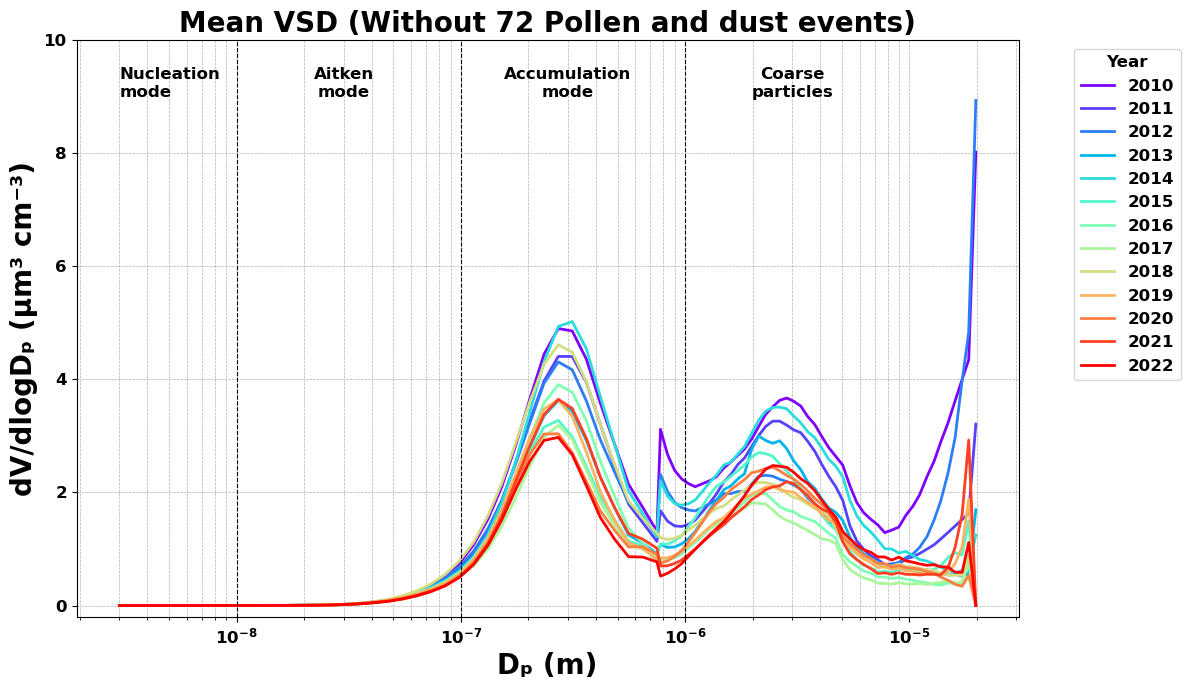

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. Without 72 Pollen and dust events.xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['Year'] = df['datetime'].dt.year

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:-1]  # Exclude datetime and Year
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors
volume_df['Year'] = df['Year']

# Group by year and compute mean volume size distribution
yearly_means = volume_df.groupby('Year').mean()

# Plotting
plt.figure(figsize=(12, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(yearly_means)))  # Rainbow colors

for i, year in enumerate(yearly_means.index):
    plt.plot(diameters_m, yearly_means.loc[year], label=str(year), color=colors[i], linewidth=2)

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 10)
plt.xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')
plt.title('Mean VSD (Without 72 Pollen and dust events)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes (moved to top of plot, bold)
y_label_pos = 9
plt.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
plt.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
plt.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

# Move legend outside the plot, bold font
leg = plt.legend(
    title='Year',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    prop={'weight': 'bold', 'size': 12}, 
    title_fontsize=12
)
leg.get_title().set_fontweight('bold') 

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

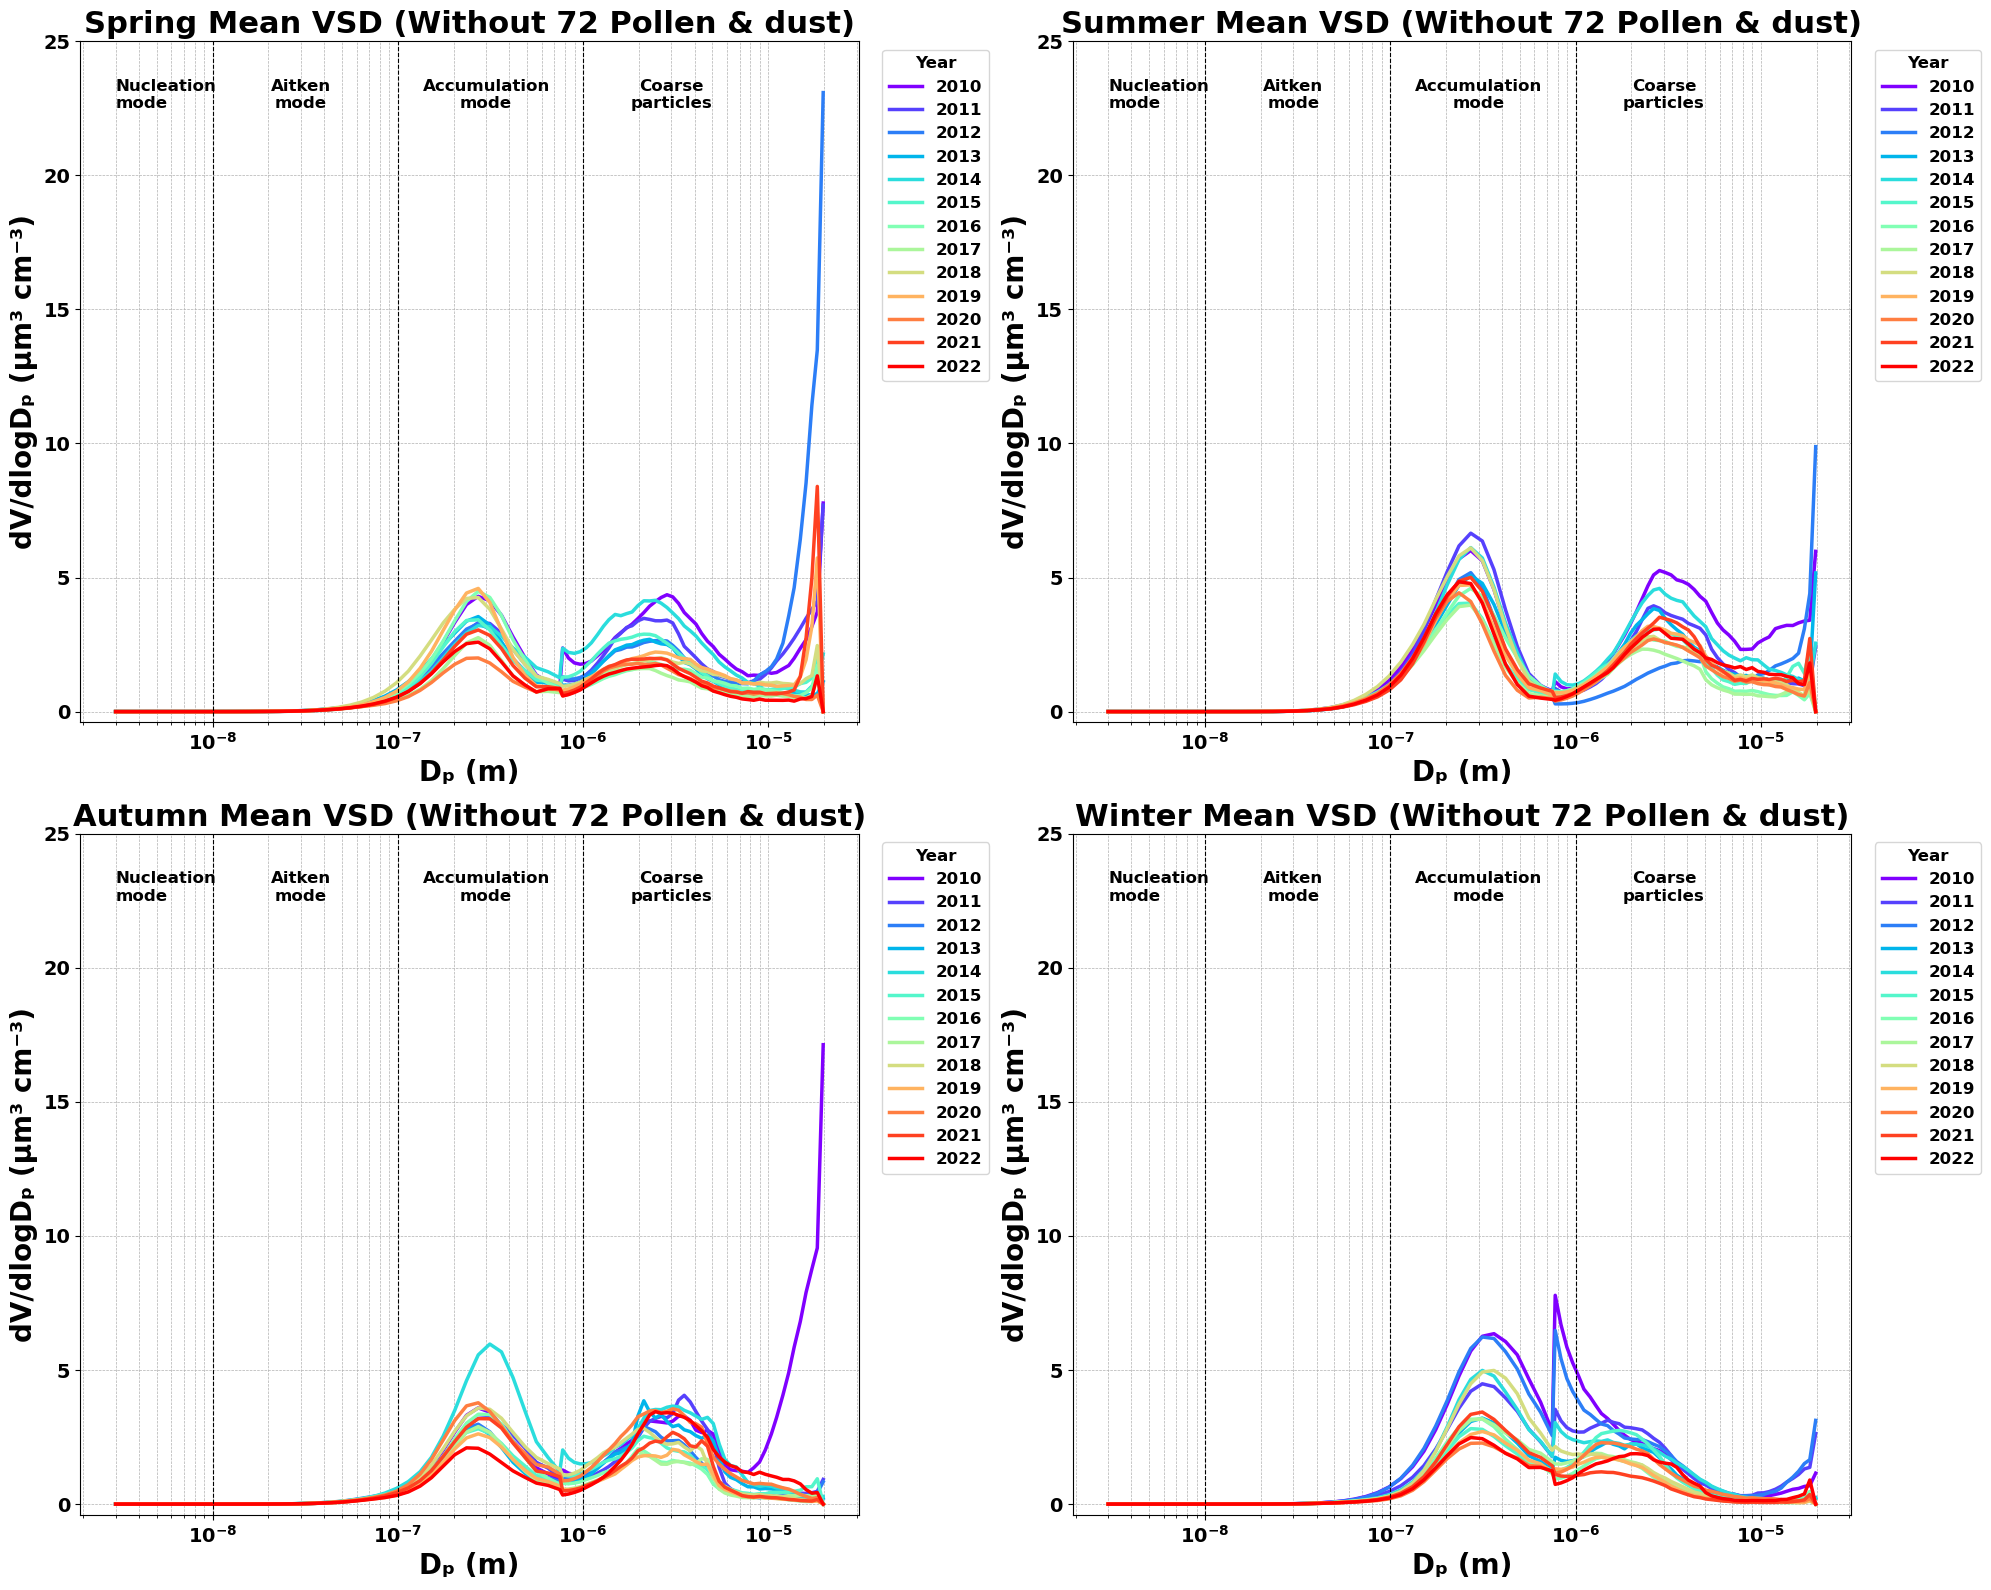

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_vsd_by_season(file_path, y_min, y_max):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Convert 'datetime' column to datetime format and extract year/month
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month

    # Extract particle diameter columns (exclude datetime, Year, Month)
    # -> assuming structure: [datetime, diameter1, diameter2, ..., diameterN, Year, Month]
    diameter_cols = df.columns[1:-2]
    diameters_m = np.array([float(col) for col in diameter_cols])  # in meters
    diameters_um = diameters_m * 1e6  # convert to micrometers

    # Calculate volume factors in µm³: (π/6) * Dp^3
    volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

    # Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
    volume_df = df[diameter_cols] * volume_factors
    volume_df['Year'] = df['Year']
    volume_df['Month'] = df['Month']

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare figure with 4 subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()

    # Loop through each season
    for i, (season, months) in enumerate(seasons.items()):
        ax = axes[i]
        season_data = volume_df[volume_df['Month'].isin(months)]

        if season_data.empty:
            ax.set_title(f'{season} (No Data)', fontsize=22, weight='bold')
            ax.axis('off')
            continue

        years = sorted(season_data['Year'].unique())
        colors = plt.cm.rainbow(np.linspace(0, 1, len(years)))

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Year'] == year]
            mean_vsd = yearly_data[diameter_cols].mean()
            ax.plot(diameters_m, mean_vsd,
                    linewidth=2.5, color=color, label=str(year))

        # Axis settings
        ax.set_xscale('log')
        ax.set_ylim(y_min, y_max)
        ax.set_title(f'{season} Mean VSD (Without 72 Pollen & dust)', fontsize=22, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, fontweight='bold')
        ax.set_ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=20, fontweight='bold')

        # Vertical lines for particle mode regions
        ax.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
        ax.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

        # Annotate modes at 90% of y-axis
        y_label_pos = y_max * 0.9
        ax.text(3e-9, y_label_pos, 'Nucleation\nmode', fontsize=12, fontweight='bold', ha='left')
        ax.text(3e-8, y_label_pos, 'Aitken\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-7, y_label_pos, 'Accumulation\nmode', fontsize=12, fontweight='bold', ha='center')
        ax.text(3e-6, y_label_pos, 'Coarse\nparticles', fontsize=12, fontweight='bold', ha='center')

        # Legend only if data exist
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            leg = ax.legend(
                title='Year', fontsize=12, title_fontsize=12,
                bbox_to_anchor=(1.02, 1), loc='upper left',
                prop={'weight': 'bold', 'size': 12}
            )
            leg.get_title().set_fontweight('bold')

        # Grid and ticks
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=14, labelcolor='black')
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

    # Layout
    plt.tight_layout()
    plt.show()
    plt.close(fig)


# === Run the function on your actual file ===
file_path = '/Users/touqeergill/Desktop/10. Without 72 Pollen and dust events.xlsx'
y_min = -0.4
y_max = 25

plot_mean_vsd_by_season(file_path, y_min, y_max)